# Co2 regulatory factors

In [1]:
import numpy as np
import pandas as pd
from math import sqrt
from seaborn import boxplot
from pandas import DataFrame
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.optimize import curve_fit
from statistics import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 1. Load the data
First of all load the dataset from the csv file.

In [2]:
#read the exccel file and convert the data into a pandas DATAFRAME
# data = pd.read_csv('SOC_processed.csv', header=0)
data = pd.read_csv('dataset.csv')
#data=data.drop(['Year'], axis=1)
data.head()

,COAL,GAS,OIL,TOTAL,GDP,CO
0,260.56,1.50,92.67,354.72,119.32,0.33
1,259.93,1.68,103.54,365.15,90.00,0.34
2,264.26,2.24,106.80,373.30,96.34,0.33
3,273.43,2.49,119.60,395.51,99.88,0.35
4,290.45,2.99,143.64,437.08,107.62,0.35


In [3]:
data.describe()

,COAL,GAS,OIL,TOTAL,GDP,CO
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,1029.496346,114.177115,565.015769,1708.688269,512.066346,0.804231
std,779.979469,118.717870,418.531653,1311.074230,463.277387,0.432835
min,259.930000,1.500000,92.670000,354.720000,90.000000,0.330000
25%,381.580000,8.552500,206.277500,591.105000,200.820000,0.427500
50%,830.030000,77.220000,427.750000,1335.000000,343.260000,0.725000
75%,1350.345000,182.702500,865.225000,2398.272500,566.990000,0.997500
max,2951.130000,379.960000,1595.800000,4867.060000,1732.560000,1.820000


# 2. Data Visualization.
Code below helps us to understand the behaviour of the data in consideration. Two scatterplots are shown below: 1) DBH vs. Total_biomass and 2) Height vs. Total_biomass. An alighnment of 45 degree would mean linear dependency between dependent and independent variable else Non-Linear.

<AxesSubplot:>

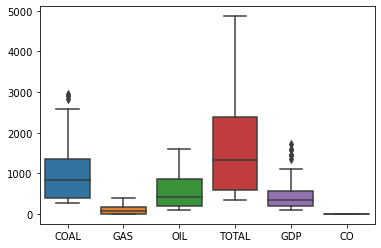

In [26]:
dataset = DataFrame(data, columns=['COAL','GAS','OIL','TOTAL','GDP','CO'])
sns.boxplot(data=dataset)

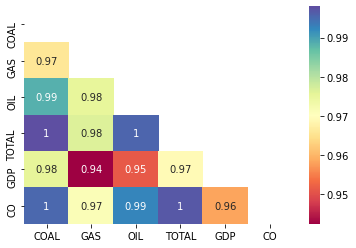

In [27]:
corr = data.corr()

mask_ut=np.triu(np.ones(corr.shape)).astype(np.bool)
mask_ut[0:5,0:5]
hmap=sns.heatmap(corr, mask=mask_ut, cmap="Spectral", annot=True)
# hmap=sns.heatmap(corr, cmap="Spectral", annot=True)
# hmap.figure.savefig("Correlation_Heatmap_Lower_Triangle_with_Seaborn.png", format='png', dpi=150)

# 3. Using Machine Learning models for the same purpose
Now we use some machine learning model to do the predictions and compare their performance with that of conventional statistical approaches.

# 3.0 Presparing train test data

In [28]:
# First step is to create the Train and Test data split as we want to test the model on unseen data 
# and not on the data which is used during training. A split of 75%-25% for training and testing is made accordingly.

X = DataFrame(data, columns=['COAL','GAS','OIL','TOTAL','GDP'])
Y = DataFrame(data, columns=['CO'])
#train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.25, random_state=0)

from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# define standard scaler
#scaler = StandardScaler()
# transform data
#scaled_X = scaler.fit_transform(X)
#scaled_Y = scaler.fit_transform(Y)




#train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size = 0.25, random_state = 0)
#train_X, test_X, train_Y, test_Y = train_test_split(scaled_X, scaled_Y, test_size = 0.25, random_state = 0)

min_max_scaler = preprocessing.MinMaxScaler()

scaled_X= min_max_scaler.fit_transform(X)
scaled_Y= min_max_scaler.fit_transform(Y)

train_X, test_X, train_Y, test_Y = train_test_split(scaled_X, scaled_Y, test_size = 0.25, random_state = 0)

In [44]:
pd.isnull(train_X).sum() > 0
#print(train_X)
#train_X._is_view

False

# 3.1 Support Vector Regression (SVR) Model

In [30]:
# SVRModel = SVR(kernel='rbf', gamma='scale', C=500.0, epsilon=0.5)
SVRModel = SVR(kernel='rbf', C=500.0, epsilon=0.5)
SVRModel.fit(train_X,train_Y)

# Making predictions using Random Forest on test data
SVRpredictions = SVRModel.predict(test_X)

SVR_R2=r2_score(test_Y,SVRpredictions)
SVR_RMSE=sqrt(mean_squared_error(test_Y, SVRpredictions))

results=pd.DataFrame()
results['Method']=['SVR']
results['R2']=[SVR_R2]
results['RMSE']=[SVR_RMSE]

# 3.2 XGB model

Feature: 0, Score: 0.95808
Feature: 1, Score: 0.00047
Feature: 2, Score: 0.00847
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.03298


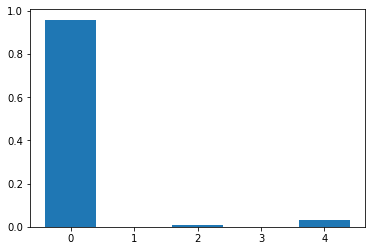

In [31]:
XGBModel = XGBRegressor()
XGBModel.fit(train_X,train_Y, verbose=False)

# Making predictions using XGBModel on test data
XGBpredictions = XGBModel.predict(test_X)

XGB_R2=r2_score(test_Y,XGBpredictions)
XGB_RMSE=sqrt(mean_squared_error(test_Y, XGBpredictions))

results.loc[1]=['XGB', XGB_R2, XGB_RMSE]

# get importance
importance = XGBModel.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# 3.3 Random Forest Regression (RFR) Model

In [32]:
RFModel = RandomForestRegressor(n_estimators=500)
RFModel.fit(train_X,train_Y)

# Making predictions using Random Forest on test data
RFpredictions = RFModel.predict(test_X)

RF_R2=r2_score(test_Y,RFpredictions)
RF_RMSE=sqrt(mean_squared_error(test_Y, RFpredictions))
results.loc[2]=['RFR', RF_R2, RF_RMSE]

# 3.4 Multiple Linear Regression (MLR) Model

In [33]:
LRModel = linear_model.LinearRegression()
LRModel.fit(train_X,train_Y)

# Making predictions using Random Forest on test data
LRpredictions = LRModel.predict(test_X)

LR_R2=r2_score(test_Y,LRpredictions)
LR_RMSE=sqrt(mean_squared_error(test_Y, LRpredictions))
results.loc[3]=['MLR', LR_R2, LR_RMSE]

# 3.5 Bagging Regression (BG) Model

In [34]:
BGModel = BaggingRegressor()
BGModel.fit(train_X,train_Y)

# Making predictions using Random Forest on test data
BGpredictions = BGModel.predict(test_X)

BG_R2=r2_score(test_Y,BGpredictions)
BG_RMSE=sqrt(mean_squared_error(test_Y, BGpredictions))
results.loc[4]=['Bagging', BG_R2, BG_RMSE]

# 3.6 AdaBoost Regression (ADB) Model

In [35]:
ADBModel = AdaBoostRegressor()
ADBModel.fit(train_X,train_Y)

# Making predictions using Random Forest on test data
ADBpredictions = ADBModel.predict(test_X)

ADB_R2=r2_score(test_Y,ADBpredictions)
ADB_RMSE=sqrt(mean_squared_error(test_Y, ADBpredictions))
results.loc[5]=['AdaBoost', ADB_R2, ADB_RMSE]

# 3.7 Ridge Regression (R) Model

In [36]:
RModel = linear_model.Ridge()
RModel.fit(train_X,train_Y)

# Making predictions using Random Forest on test data
Rpredictions = RModel.predict(test_X)

R_R2=r2_score(test_Y,Rpredictions)
R_RMSE=sqrt(mean_squared_error(test_Y, Rpredictions))
results.loc[6]=['Ridge', R_R2, R_RMSE]

# 3.8 Polynomial Regression (Poly)

In [37]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

polynomial_features= PolynomialFeatures(degree=5)

POLYmodel = LinearRegression()
POLYmodel.fit(train_X,train_Y)
POLYpredictions = POLYmodel.predict(test_X)

POLY_R2=r2_score(test_Y,POLYpredictions)
POLY_RMSE=sqrt(mean_squared_error(test_Y, POLYpredictions))
results.loc[7]=['Polynomial Regression', POLY_R2, POLY_RMSE]
POLYmodel.coef_

array([[ 6.83740217e+02,  9.61151148e+01,  3.81593783e+02,
        -1.14492955e+03, -1.86950545e-01]])

# 3.9 Artificial Neural Network

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


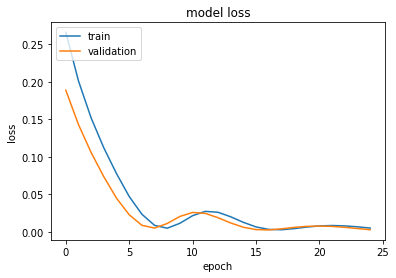

In [38]:
y=np.reshape(Y, (-1,1))


ANNmodel = Sequential()
ANNmodel.add(Dense(300, input_dim=5, kernel_initializer='normal', activation='relu'))
ANNmodel.add(Dense(200, activation='relu'))
ANNmodel.add(Dense(100, activation='relu'))
ANNmodel.add(Dense(1, activation='linear'))
# ANNmodel.summary()

ANNmodel.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

history = ANNmodel.fit(train_X, train_Y, epochs=25, batch_size=50,  verbose=0, validation_split=0.3)

print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [39]:
ANNmodel.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 300)               1800      
_________________________________________________________________
dense_9 (Dense)              (None, 200)               60200     
_________________________________________________________________
dense_10 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 101       
Total params: 82,201
Trainable params: 82,201
Non-trainable params: 0
_________________________________________________________________


In [40]:
ANNpredictions = ANNmodel.predict(test_X)

ANN_R2=r2_score(test_Y,ANNpredictions)

ANN_RMSE=sqrt(mean_squared_error(test_Y, ANNpredictions))
results.loc[8]=['ANN', ANN_R2, ANN_RMSE]

# 4. Visualizing the results
R2 and RMSE values are used here to measure the model performance. These values for all four models are furnished in the table below. Overall performance in terms of measured vs observed plot is also presented in the following Figure.

In [41]:
results

,Method,R2,RMSE
0,SVR,-2.061271,0.296644
1,XGB,0.991000,0.016085
2,RFR,0.993051,0.014133
3,MLR,0.979779,0.024109
4,Bagging,0.993010,0.014175
5,AdaBoost,0.979350,0.024364
6,Ridge,0.943672,0.040239
7,Polynomial Regression,0.979779,0.024109
8,ANN,0.885248,0.057433


In [42]:
results.iloc[1,1]

0.9909995831702121

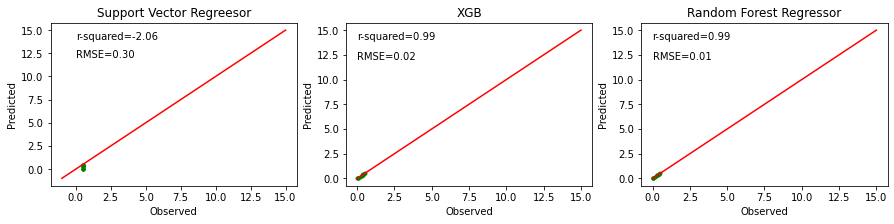

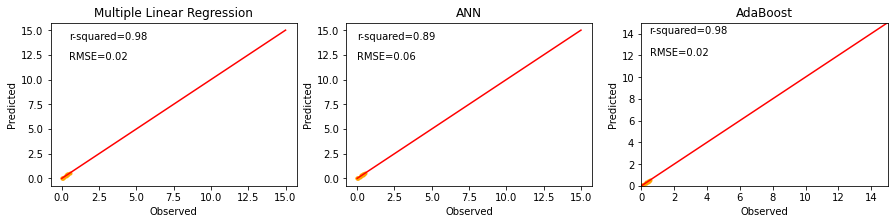

In [43]:
f1 = plt.figure(figsize=(15,3))
fig1 = f1.add_subplot(1,3,1)
fig2 = f1.add_subplot(1,3,2)
fig3 = f1.add_subplot(1,3,3)

f2 = plt.figure(figsize=(15,3))
fig4 = f2.add_subplot(1,3,1)
fig5 = f2.add_subplot(1,3,2)
fig6 = f2.add_subplot(1,3,3)

# f3 = plt.figure(figsize=(15,3))
# fig7 = f3.add_subplot(1,3,1)
# fig8 = f3.add_subplot(1,3,2)
# fig9 = f3.add_subplot(1,3,3)

fig1.scatter(SVRpredictions, test_Y, c='green', marker=".")
fig1.set_xlabel('Observed')
fig1.set_ylabel('Predicted')
fig1.set_title('Support Vector Regreesor')
fig1.annotate("r-squared={:.2f}".format(results.iloc[0,1]),(0,14))
fig1.annotate("RMSE={:.2f}".format(results.iloc[0,2]), (0,12))
lims = [-1, 15]
plt.xlim(lims)
plt.ylim(lims)
_ = fig1.plot(lims, lims, c='red')

fig2.scatter(XGBpredictions, test_Y, c='green', marker=".")
fig2.set_xlabel('Observed')
fig2.set_ylabel('Predicted')
fig2.set_title('XGB')
fig2.annotate("r-squared={:.2f}".format(results.iloc[1,1]),(0,14))
fig2.annotate("RMSE={:.2f}".format(results.iloc[1,2]), (0,12))
lims = [0, 15]
plt.xlim(lims)
plt.ylim(lims)
_ = fig2.plot(lims, lims, c='red')

fig3.scatter(RFpredictions, test_Y, c='green', marker=".")
fig3.set_xlabel('Observed')
fig3.set_ylabel('Predicted')
fig3.set_title('Random Forest Regressor')
fig3.annotate("r-squared={:.2f}".format(results.iloc[2,1]),(0,14))
fig3.annotate("RMSE={:.2f}".format(results.iloc[2,2]), (0,12))
lims = [0, 15]
plt.xlim(lims)
plt.ylim(lims)
_ = fig3.plot(lims, lims, c='red')

# ----------------------------------------------------------------------------------------------------------

fig4.scatter(LRpredictions, test_Y, c='orange', marker=".")
fig4.set_xlabel('Observed')
fig4.set_ylabel('Predicted')
fig4.set_title('Multiple Linear Regression')
fig4.annotate("r-squared={:.2f}".format(results.iloc[3,1]),(0.5,14))
fig4.annotate("RMSE={:.2f}".format(results.iloc[3,2]), (0.5,12))
lims = [0, 15]
plt.xlim(lims)
plt.ylim(lims)
_ = fig4.plot(lims, lims, c='red')

fig5.scatter(BGpredictions, test_Y, c='orange', marker=".")
fig5.set_xlabel('Observed')
fig5.set_ylabel('Predicted')
fig5.set_title('ANN')
fig5.annotate("r-squared={:.2f}".format(results.iloc[8,1]),(0,14))
fig5.annotate("RMSE={:.2f}".format(results.iloc[8,2]), (0,12))
# fig5.set_title('Bagging')
# fig5.annotate("r-squared={:.2f}".format(results.iloc[4,1]),(0,14))
# fig5.annotate("RMSE={:.2f}".format(results.iloc[4,2]), (0,12))
lims = [0, 15]
plt.xlim(lims)
plt.ylim(lims)
_ = fig5.plot(lims, lims, c='red')

fig6.scatter(ADBpredictions, test_Y, c='orange', marker=".")
fig6.set_xlabel('Observed')
fig6.set_ylabel('Predicted')
fig6.set_title('AdaBoost')
fig6.annotate("r-squared={:.2f}".format(results.iloc[5,1]),(0.5,14))
fig6.annotate("RMSE={:.2f}".format(results.iloc[5,2]), (0.5,12))
lims = [0, 15]
plt.xlim(lims)
plt.ylim(lims)
_ = fig6.plot(lims, lims, c='red')

# ----------------------------------------------------------------------------------------------------------

# fig7.scatter(Rpredictions, test_Y, c='cyan', marker=".")
# fig7.set_xlabel('Observed')
# fig7.set_ylabel('Predicted')
# fig7.set_title('Ridge')
# fig7.annotate("r-squared={:.2f}".format(results.iloc[6,1]),(0,14))
# fig7.annotate("RMSE={:.2f}".format(results.iloc[6,2]), (0,12))
# lims = [0, 15]
# plt.xlim(lims)
# plt.ylim(lims)
# _ = fig7.plot(lims, lims, c='red')

# fig8.scatter(POLYpredictions, test_Y, c='cyan', marker=".")
# fig8.set_xlabel('Observed')
# fig8.set_ylabel('Predicted')
# fig8.set_title('Polynomial')
# fig8.annotate("r-squared={:.2f}".format(results.iloc[7,1]),(0,14))
# fig8.annotate("RMSE={:.2f}".format(results.iloc[7,2]), (0,12))
# lims = [0, 15]
# plt.xlim(lims)
# plt.ylim(lims)
# _ = fig8.plot(lims, lims, c='red')

# fig9.scatter(ANNpredictions, test_Y, c='cyan', marker=".")
# fig9.set_xlabel('Observed')
# fig9.set_ylabel('Predicted')
# # fig9.set_title('ANN')
# # fig9.annotate("r-squared={:.2f}".format(results.iloc[8,1]),(1,14))
# # fig9.annotate("RMSE={:.2f}".format(results.iloc[8,2]), (1,12))
# fig9.set_title('Bagging')
# fig9.annotate("r-squared={:.2f}".format(results.iloc[4,1]),(0,14))
# fig9.annotate("RMSE={:.2f}".format(results.iloc[4,2]), (0,12))
# lims = [0, 15]
# plt.xlim(lims)
# plt.ylim(lims)
# fig9.plot(lims, lims, c='red')

# # plt.subplots_adjust(wspace=0.1, hspace=5)
# # plt.savefig('SOC.png',dpi=150,facecolor='w')